Fenix and Neil started working through tutorial

Date: 11/18/21, 3:20-4:30pm

This tutorial is modified from: https://sep.readthedocs.io/en/v1.0.x/tutorial.html

12/2/21: Fenix cloned tutorial code and changed file name to "hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits"

Reminder - comment out pngs if not currently looking to save!!!


## Mark down/comments for cells 1-8 - Neil

(Neil)
First we import all the modules we will be using !
We import:
- astropy as we will be using its fits module to access our FITS image file;
- matplotlib.pyplot so we can use it to display our images and graphs;
- numpy so we can use arrays and special characters like pi
- sep has various functions, we will use it to find the background in the image, extract the sources within the image, and to calculate the aperture (sep-Fenix)

In [1]:
import numpy as np
import sep

(Neil)
In the cell below, ‘RcParams’ refers to runtime configuration parameters and this allows us to give values to certain parameters like the size ( in this case) for all the plots we make in the Jupyter notebook. Since we define the size here, we won’t have to give size parameters individually to every plot in our code. 

In [2]:
# additional setup for reading the test image and displaying plots
import astropy
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib import rcParams

%matplotlib inline

rcParams['figure.figsize'] = [10., 8.]

(Fenix)
Summary: This cell opens our fits file and sets the image information equal to image_data.

(Neil)
The open function [fits.open( )] returns a type of object called an HDUList. These are collections of HDU (Header data unit) objects which make up the highest level component in the FITS file structure and usually consist of a header and a data array.

Here image.fits is the name of our FITS image file!

HDUs files consist of a primary block, and sometimes a few more blocks (extensions HDUs). The image information is typically stored in the primary HDU block which lives in the 0 index of the HDUList (hdu_list[0]). The ‘ .data’ attribute is then used to access the data portion of the primary HDU. Using the “image_data = hdu_list[0].data “ we now have the image data stored as a numpy array.

In [3]:
hdu_list = fits.open("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")
hdu_list.info()
print(hdu_list[0].header)

#Initialized variable with image array
image_data = hdu_list[0].data

#necessary to reorder the array when using SEP!!!
image_data = image_data.byteswap().newbyteorder()

print(image_data.shape)

Filename: hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     359   (3600, 3600)   float32   
SIMPLE  =                    T / Fits standard                                  BITPIX  =                  -32 / Bits per pixel                                 NAXIS   =                    2 / Number of axes                                 NAXIS1  =                 3600 / Axis length                                    NAXIS2  =                 3600 / Axis length                                    EXTEND  =                    F / File may contain extensions                    IRAF-TLM= '2012-12-04T19:12:18' / Time of last modification                     FILENAME= 'hlsp_candels_hst_hst_hudf12_wfc3ir_f105w_60mas' / MAST HLSP FileName OBJECT  = 'HLSP_HUDF12_HST_WFC3IR_UDFMAIN_F105W_60MAS_V1.0_DRZ[1/1]'            ORIGIN  = 'KPNO-IRAF'           /                                               DATE    =

(Fenix)
Summary: This cell plots the data, or original image, as is, and saves it as a png. 

(Neil)
Image_data is an array. np.mean returns the average of the array elements and np.std returns the standard deviation of the array elements.

Plt.imshow - used to display data as an image. We give it the image_data.

The interpolation is set to ‘nearest’ since we want to simply display the image without trying to interpolate between the pixels. (Nearest cause we are scaling up a smaller image) . 

The color map (camp) is set to a gray scale. 

Vmin and vmax define the data range that is covered by the supplied data. 

Origin = lower sets the [0,0] index of the array in the lower left corner of the axes.

plt.colorbar() - adds a colorbar to the plot

Lastly we save the image as a png. bbox_inches helps remove any whitespace around the image and dpi (dots per inch) specifies how many pixels the image comprises of.

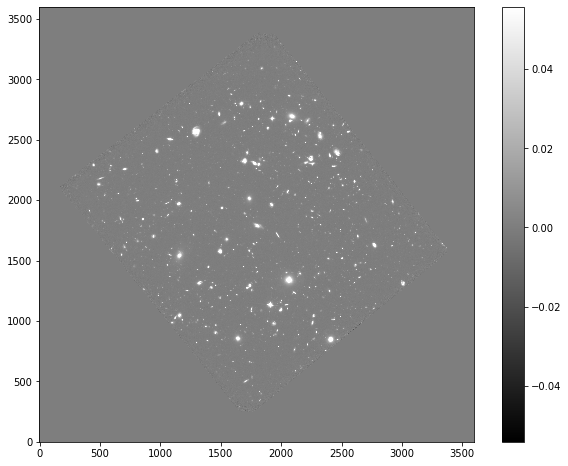

In [4]:
# show the image
m, s = np.mean(image_data), np.std(image_data)  
plt.imshow(image_data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();

#Saving the original image plot as a png
plt.savefig('f105w_image_1.png',bbox_inches="tight",dpi=600)

#looking for zeropoint in the wide field camera 3
#zero point for wfc3 in 3012 - 26.2687
#https://www.stsci.edu/hst/instrumentation/wfc3/data-analysis/photometric-calibration/ir-photometric-calibration

(Neil) The bkg object holds information about the spatially varying background and the spatially varying background noise level

Fenix - sep.background treats our image like an array and separates out the background/noise from each element and returns these values as its own separate array. This is because within every element there is a variable amount of background (very little background if an element contains part of an object to all background if it's just empty space).

# Background subtraction

In [5]:
# measure a spatially varying background on the image

bkg = sep.Background(image_data)

(Neil)

.globalback attribute returns the mean background noise and .globalrms returns the root mean square value of the bkg data

In [6]:
# get a "global" mean and noise of the image background:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


(Neil)
The .back attribute creates an array of the background with the same dimensions as the original data

In [7]:
# evaluate background as 2-d array, same size as original image
bkg_image = bkg.back()

# bkg_image = np.array(bkg) # equivalent to above

(Neil) 
This cell displays the background image data stored as an array in the bkg_image variable as an image. We pass imshow the same parameters as we did for the previous image and then save the image afterwards.

In [ ]:
# show the background
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();


#Saving the background plot as a png
plt.savefig('f105w_image_2.png',bbox_inches="tight",dpi=600)

## Mark down/comments for cells 9-18 - Fenix

(Fenix) The .rms member function of the SEP background object (denoted as 'bkg' and initialized in cell 5) evaluates on the background as a 2d array and computes the root-mean-squared, or standard deviation, for each element(or pixel). It then creates a new array (equal in size to bkg) containing these calculations. 

In [8]:
# evaluate the background noise as 2-d array, same size as original image
bkg_rms = bkg.rms()

#Printing to confirm image and noise are in same sized arrays
print("Length of bkg_image: ",len(bkg_image))
print("Length of bkg_rms: ",len(bkg_rms))

Length of bkg_image:  3600
Length of bkg_rms:  3600


(Fenix) This cell plots the previously calculated standard deviation, or optical noise, of the background, pixel by pixel. This noise is normally attributed to the electronic noise of physical instrumentation/cameras used and the surrounding light pollution from when the image was taken.

In [ ]:
# show the background noise

#interpolation='nearest' makes sure that the pixels are plotted individually and 
#not artificially adjusted to increase the resolution of the display
#cmap='gray' colors the plot as a grayscale color scheme
#origin='lower' tells the plotting of data to begin from the bottom left
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')

#this plots the color bar alongside the noise plot
#based on the color scheme chosen, rms values below 62 are shown as black
#rms values above 68 are white
#rms values between 62-68 are on a grayscale that lightens as the values increase
plt.colorbar();

#Saving the background noise plot as a png
plt.savefig('f105w_image_3.png',bbox_inches="tight",dpi=600)

(Fenix) This cell removes the background value from each pixel in the original image. This makes it easier in the future to determine a threshold value that will determine what is considered an object and what was simply empty space in the image. This can be thought of an an array being subtracted from another of equal size. 

In [9]:
# subtract the background
data_sub = image_data - bkg

# Object detection

(Fenix)

The extract function uses numerous parameters to detect objects within an image. The general form (found on https://sep.readthedocs.io/en/v1.0.x/api/sep.extract.html) is: 

sep.extract(data, thresh, err=None, mask=None, minarea=5, filter_kernel=default_kernel, filter_type='matched', deblend_nthresh=32, deblend_cont=0.005, clean=True, clean_param=1.0, segmentation_map=False)

In [10]:
#Matching parameters to the general form:
    #data_sub is the array of the background-subtracted image. This is the array
        #that "extract" will operate on
    #1.5 is the float threshold value we will multiply by the error.
    #err=bkg.globalrms is a float and the "global" noise of the image background
    #Several more parameters can be added to create a more specialized search.
    
#The function expect will compare each element in data_sub to 1.5err. A pixel above the 
    #threshold is considered to be part of an object
#The objects detected will be returned as an array
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

(Fenix)
This cell confirms that the number of objects detected is equal to the length of the array returned by "extract" function.

In [18]:
# how many objects were detected
print("Number of objects detected:",len(objects))

Number of objects detected: 8640


(Fenix) Now that the objects have been detected within the image, they can be visually highlighted with ellipses. This makes it easier to locate where these objects are on the image itself.

First, we need to import the ellipse-shaped patch to be superimposed over the image. 

Note that we plot the background-subtracted image as opposed to the original. This is because the background-subtracted version was used to find the objects. 

In [ ]:
from matplotlib.patches import Ellipse

# plot background-subtracted image

#we use subplots because we are going to place a plot of ellipses
#over the image plot so that they overlap. Together, this indicates
#where the objects are visually. 
fig, ax = plt.subplots()

#m is the average value of the data_sub array
#s is the standard deviation of the data set from the average
m, s = np.mean(data_sub), np.std(data_sub)

#this plots the data_sub image first
    #interpolation='nearest' makes sure that the pixels are plotted individually and 
        #not artificially adjusted to increase the resolution of the display
    #cmap='gray' colors the plot as a grayscale color scheme
    #vmin is the minimum variability
    #vmax is the maximum variability
    #origin='lower' tells the plotting of data to begin from the bottom left
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

# plot an ellipse for each object
#i will iterate from 0 to 67 since len(objects)=68
for i in range(len(objects)):
    #xy are the coordinates of the ellipse center, which are given by the
        #ith terms of the x and y centroid coordinates
    #the width is the horizontal diameter, scaled by 6
    #the height is the vertical diameter, scaled by 6
    #the angle rotates the ellipse by 180/pi
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    
    e.set_facecolor('none') #this makes the ellipse an empty outline without shading inside
    e.set_edgecolor('red')  #this makes the ellipse outline red
    
    #this updates the plot with the newly oriented ellipse to indicate the ith object 
    #on the data-subtracted image
    #ellipses are added starting at the bottom left
    ax.add_artist(e)

#Saving the object search plot as a png
plt.savefig('f105w_image_4.png',bbox_inches="tight",dpi=600)


(Fenix) This cell serves to show all the additional data analysis functions that can be used on the array object (contains number of objects detected in image and where they are located). For example, we can find the minimum and maximum coordinates of pixels within the object array using (xmin,ymin) and (xmax,ymax). Further information on these parameters can be found at the bottom of the page here: https://sep.readthedocs.io/en/v1.0.x/api/sep.extract.html

In [ ]:
# available fields
objects.dtype.names

# Aperture photometry

(Fenix) Aperture photometry finds the fluctuation between pixels in a circle within a certain radius and the surrounding pixels just outside of that circle. The following cell finds the fluctuation between pixels for the previously detected objects.

The function sum_circle sums up the pixels within the given circle, calculates the error, and gives an array of flags.The general form of the sum_circle function can be found on https://sep.readthedocs.io/en/v1.0.x/api/sep.sum_circle.html and is as follows: 

sep.sum_circle(data, x, y, r, err=None, var=None, mask=None, maskthresh=0.0, bkgann=None, gain=None, subpix=5)

In [11]:
#flux, fluxerr, and flag will all be arrays
#data_sub is the array to be operated on
#object['x'] is the x centroid coordinate of a given circle
#object['y'] is the y centroid coordinate of a given circle
#3.0 is radius, aka 3 pixels
#err=bkg.globalrms sets the error to be the constant noise (a float)
#gain=1.0 accounts for poisson noise in aperture sum
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)

(Fenix) This cells prints out the first 10 objects results (out of 8640) calculated in the previous cell by sum_circle. 

In [12]:
# show the first 10 objects results:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


## Histograming the fluxes with AB magnitude - Fenix and Neil

Fenix:
AB Magnitude conversion using: https://www.stsci.edu/~dcoe/zitrin/RMJ1212/catalogs/IR_detection/PhotoZ/html/714.cat

AB magnitude, or absolute magnitude, shows us the intensity of an object (star/galaxy) as it would be if it was 10 parsecs away. This is because as objects travel away from us, their intensity is redshifted (the wavelength of light becomes longer with less energy). 

From the header file we found that:
- the native units for flux are electrons/second. 
- AB mag = zeropoint - 2.5 * log10(flux)
- Magnitude uncertainties correspond to the flux 1-sigma upper limits:
  magerr = 2.5 * log10(1 + fluxerr / flux)
- f105w_flux: F105W isophotal flux  (multiplied by 1.019 to correct for extinction (-0.020 mag))
- 37 f105w_fluxerr: F105W isophotal flux uncertainty    (1.019 factor applied here as well)

Zeropoint for WFC3 2012 found here: https://www.stsci.edu/hst/instrumentation/wfc3/data-analysis/photometric-calibration/ir-photometric-calibration
R = 0.4 arcsec - F105W - AB Magnitude - 26.0974

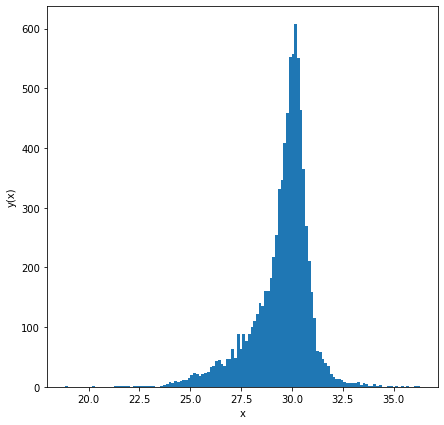

In [19]:
#AB Magnitude conversion
#Discussion section 12/2/21 3:20-4:25pm Neil and Fenix
#Meeting 12/5/21 2:00pm Neil and Fenix

#Before converting to AB Magnitude, negative flux values need to be removed
#to avoid "nan" error, these are irrelevant data points since
#real objects would not have negative fluxes
#Extract all positive non-zero values from flux array
flux_positive = np.extract(flux>0,flux)

#Commented out value checking
#print("Removed",(len(flux)-len(flux_positive)), "zero/negative flux values")
#for i in range(10):
    #print("object {:d}: flux = {:f} ".format(i, flux_positive[i],))

#looking for zeropoint in the wide field camera 3
#zero point for wfc3 in 2012 = 26.2687 
#from header - potentially useful -  PHOTZPT = -2.1100000E+01 / ST magnitude zero point
zeropoint = 26.0974
ABMag = zeropoint -2.5*np.log10(flux_positive) 

#Commented out value checking
#for i in range(10):
   #print("object {:d}: ABMag = {:f}".format(i, ABMag[i]))
    
fig = plt.figure(figsize = (7,7))
plt.xlabel('x')
plt.ylabel('y(x)')

#Neil
#a histogram plots the number of data points that are within specific 
#intervals of whatever is being measured/studied. 
#from astropy, plot histogram with matplot, cast data from a 2d array
histogram = plt.hist(ABMag.flatten(),bins='auto')